<a href="https://colab.research.google.com/github/kaholict/Karpov-Course/blob/main/K_C_lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


1) Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [ ]:
names = 'Name1 Surname1, Name2 Surname2, Name3 Surname3, Name4 Surname4'

In [ ]:
names_list = names.split(', ')
names_list

['Name1 Surname1', 'Name2 Surname2', 'Name3 Surname3', 'Name4 Surname4']

2) В переменной df содержатся данные как на картинке task2.png (находится в папке с заданием)
Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35

In [ ]:
test_df = pd.DataFrame(data={'Клиент id': [1, 2, 3, 4, 5], 'Пол': [1, 1, 1, 0, 0], 'Благосостояние': ['medium', 'high', 'high', 'low', 'medium'], 'Возраст': [63, 54, 62, 54, 37]})
test_df

,Клиент id,Пол,Благосостояние,Возраст
0,1,1,medium,63
1,2,1,high,54
2,3,1,high,62
3,4,0,low,54
4,5,0,medium,37


3) Ваш коллега-новичок перепутал названия колонок в таблице из предыдущих заданий и прислал вам такой вариант task3.png (находится в папке с заданием)
Приведите таблицу к каноничному виду, сохранив её в ту же переменную df, где сейчас находится нестандартно наименнованная таблица (воспользуйтесь методом rename)
Note: колонка называется Клиент id - шрифт плохо передаёт кейс i в id

In [ ]:
test_df.rename(columns={'Клиент id': 'client_id', 'Пол': 'sex', 'Благосостояние': 'wealth', 'Возраст': 'age'}, inplace=True)

In [ ]:
medium_35 = test_df.query("wealth =='medium' and age > 35")
medium_35

,client_id,sex,wealth,age
0,1,1,medium,63
4,5,0,medium,37


4)Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться больше ли возраст 30 лет (булиновское значение)

In [ ]:
test_df['older_than_30'] = test_df.age > 30
test_df

,client_id,sex,wealth,age,older_than_30
0,1,1,medium,63,True
1,2,1,high,54,True
2,3,1,high,62,True
3,4,0,low,54,True
4,5,0,medium,37,True


5) А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [ ]:
unique_num = test_df.nunique()
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

In [ ]:
data = pd.DataFrame(data={'client_id': [0, 1, 2, 3, 4], 'amount': [42331, 88420, 1714, 80572, 57549], 'date': [1585425830, 1585429536, 1585427761, 1585427077, 1585426290]})
data

,client_id,amount,date
0,0,42331,1585425830
1,1,88420,1585429536
2,2,1714,1585427761
3,3,80572,1585427077
4,4,57549,1585426290


6) У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида: task6.png
Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать переменные иногда бывает сложно)

In [ ]:
test_df.merge(data, how='inner', on='client_id')

,client_id,sex,wealth,age,older_than_30,amount,date
0,1,1,medium,63,True,88420,1585429536
1,2,1,high,54,True,1714,1585427761
2,3,1,high,62,True,80572,1585427077
3,4,0,low,54,True,57549,1585426290


In [ ]:
def read_n_agg(path):
  func_df = pd.read_csv(path, sep=';')
  return func_df.groupby('company', as_index=False).agg({'income': 'mean'})

In [ ]:
read_n_agg('/content/companies.csv').head()

,company,income
0,En +,9.962187e+10
1,"АО «Александрова, Савельев и Мельникова»",7.206782e+10
2,АО «Андреев-Анисимов»,6.931948e+09
3,АО «Андреев-Макарова»,8.934380e+10
4,АО «Большаков Кошелева»,7.860861e+10


In [ ]:
df = pd.read_csv('/content/taxi_peru.csv', 
                 sep=';', 
                 parse_dates=['start_at', 'end_at', 'arrived_at'])

journey_id – уникальный id поездки  
user_id – id пользователя  
driver_id – id водителя  
taxi_id – id машины  
icon – тип поездки  
start_type – тип заказа (asap, reserved, delayed)  
start_at – время начала поездки  
start_lat – исходное местоположение пользователя, широта  
start_lon – исходное местоположение пользователя, долгота  
end_at – время окончания поездки  
end_lat – итоговое местоположение, широта  
end_lon – итоговое местоположение, долгота  
end_state – состояние заказа  
driver_start_lat – исходное местоположение водителя, широта  
driver_start_lon – исходное местоположение водителя, долгота  
arrived_at – время прибытия водителя  
source – платформа, с которой сделан заказ  
driver_score – оценка водителя клиентом  
rider_score – оценка клиента водителем

In [ ]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  datetime64[ns]
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

9) Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [ ]:
df.source.value_counts() / df.shape[0] * 100

iPhone     42.148760
web        33.018909
Android    21.240968
iPad        2.470685
Wap         0.588464
Name: source, dtype: float64

In [ ]:
(
    df
 .source
 .value_counts(normalize=True)
 .mul(100)
 .round()
    )

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

10) Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts
Полезные функции:
.mul() – умножение, более удобный вариант для использования в цепочке методов 
.round() – округление
.reset_index() – сбросить индекс
.value_counts() – сколько раз встречается каждое значение переменной

In [ ]:
driver_score_counts = df.driver_score.value_counts(normalize=True).mul(100).round(2).reset_index().rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}).sort_values('driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

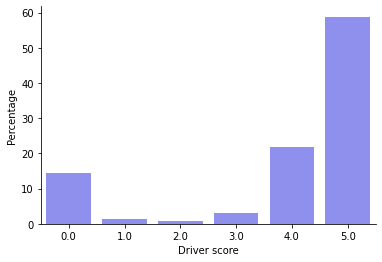

In [ ]:
ax = sns.barplot(x=driver_score_counts.driver_score, 
                 y=driver_score_counts.percentage, 
                 data=driver_score_counts, 
                 color='blue', 
                 alpha=0.5)
ax.set(xlabel='Driver score', 
       ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

12) Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [ ]:
rider_score_counts = df.rider_score.value_counts(normalize=True).mul(100).round(2).reset_index().rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}).sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


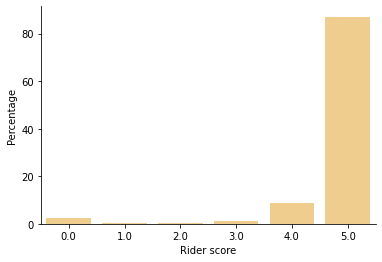

In [ ]:
ax = sns.barplot(x=rider_score_counts.rider_score, 
                 y=rider_score_counts.percentage, 
                 data=rider_score_counts, 
                 color='orange', 
                 alpha=0.5)
ax.set(xlabel='Rider score', 
       ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Среди оценок водителей и пассажиров преобладает оценка 5.0, однако среди оценок пассажиров имеет место большее число низких оценок.